In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize, scale
import tensorflow as tf

from datassist import explore, graph

In [2]:
df_heart = pd.read_csv('data/heart_failure_clinical_records_dataset.xls')

In [3]:
df_heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Examine Data

In [4]:
df_heart.shape

(299, 13)

In [5]:
explore.overview(df_heart)

,NULL Count,Unique Items,Type
age,0,47,float64
anaemia,0,2,int64
creatinine_phosphokinase,0,208,int64
diabetes,0,2,int64
ejection_fraction,0,17,int64
high_blood_pressure,0,2,int64
platelets,0,176,float64
serum_creatinine,0,40,float64
serum_sodium,0,27,int64
sex,0,2,int64


In [6]:
explore.basic_stats(df_heart)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.0,299.0,299.0,299.0,299.0,299.0,299.0
mean,60.8,581.8,38.1,263358.0,1.4,136.6,130.3
std,11.9,970.3,11.8,97804.2,1.0,4.4,77.6
min,40.0,23.0,14.0,25100.0,0.5,113.0,4.0
25%,51.0,116.5,30.0,212500.0,0.9,134.0,73.0
50%,60.0,250.0,38.0,262000.0,1.1,137.0,115.0
75%,70.0,582.0,45.0,303500.0,1.4,140.0,203.0
max,95.0,7861.0,80.0,850000.0,9.4,148.0,285.0
median,60.0,250.0,38.0,262000.0,1.1,137.0,115.0
mode,60.0,582.0,35.0,263358.0,1.0,136.0,187.0


# Investigate Normalization and Scaling of Features

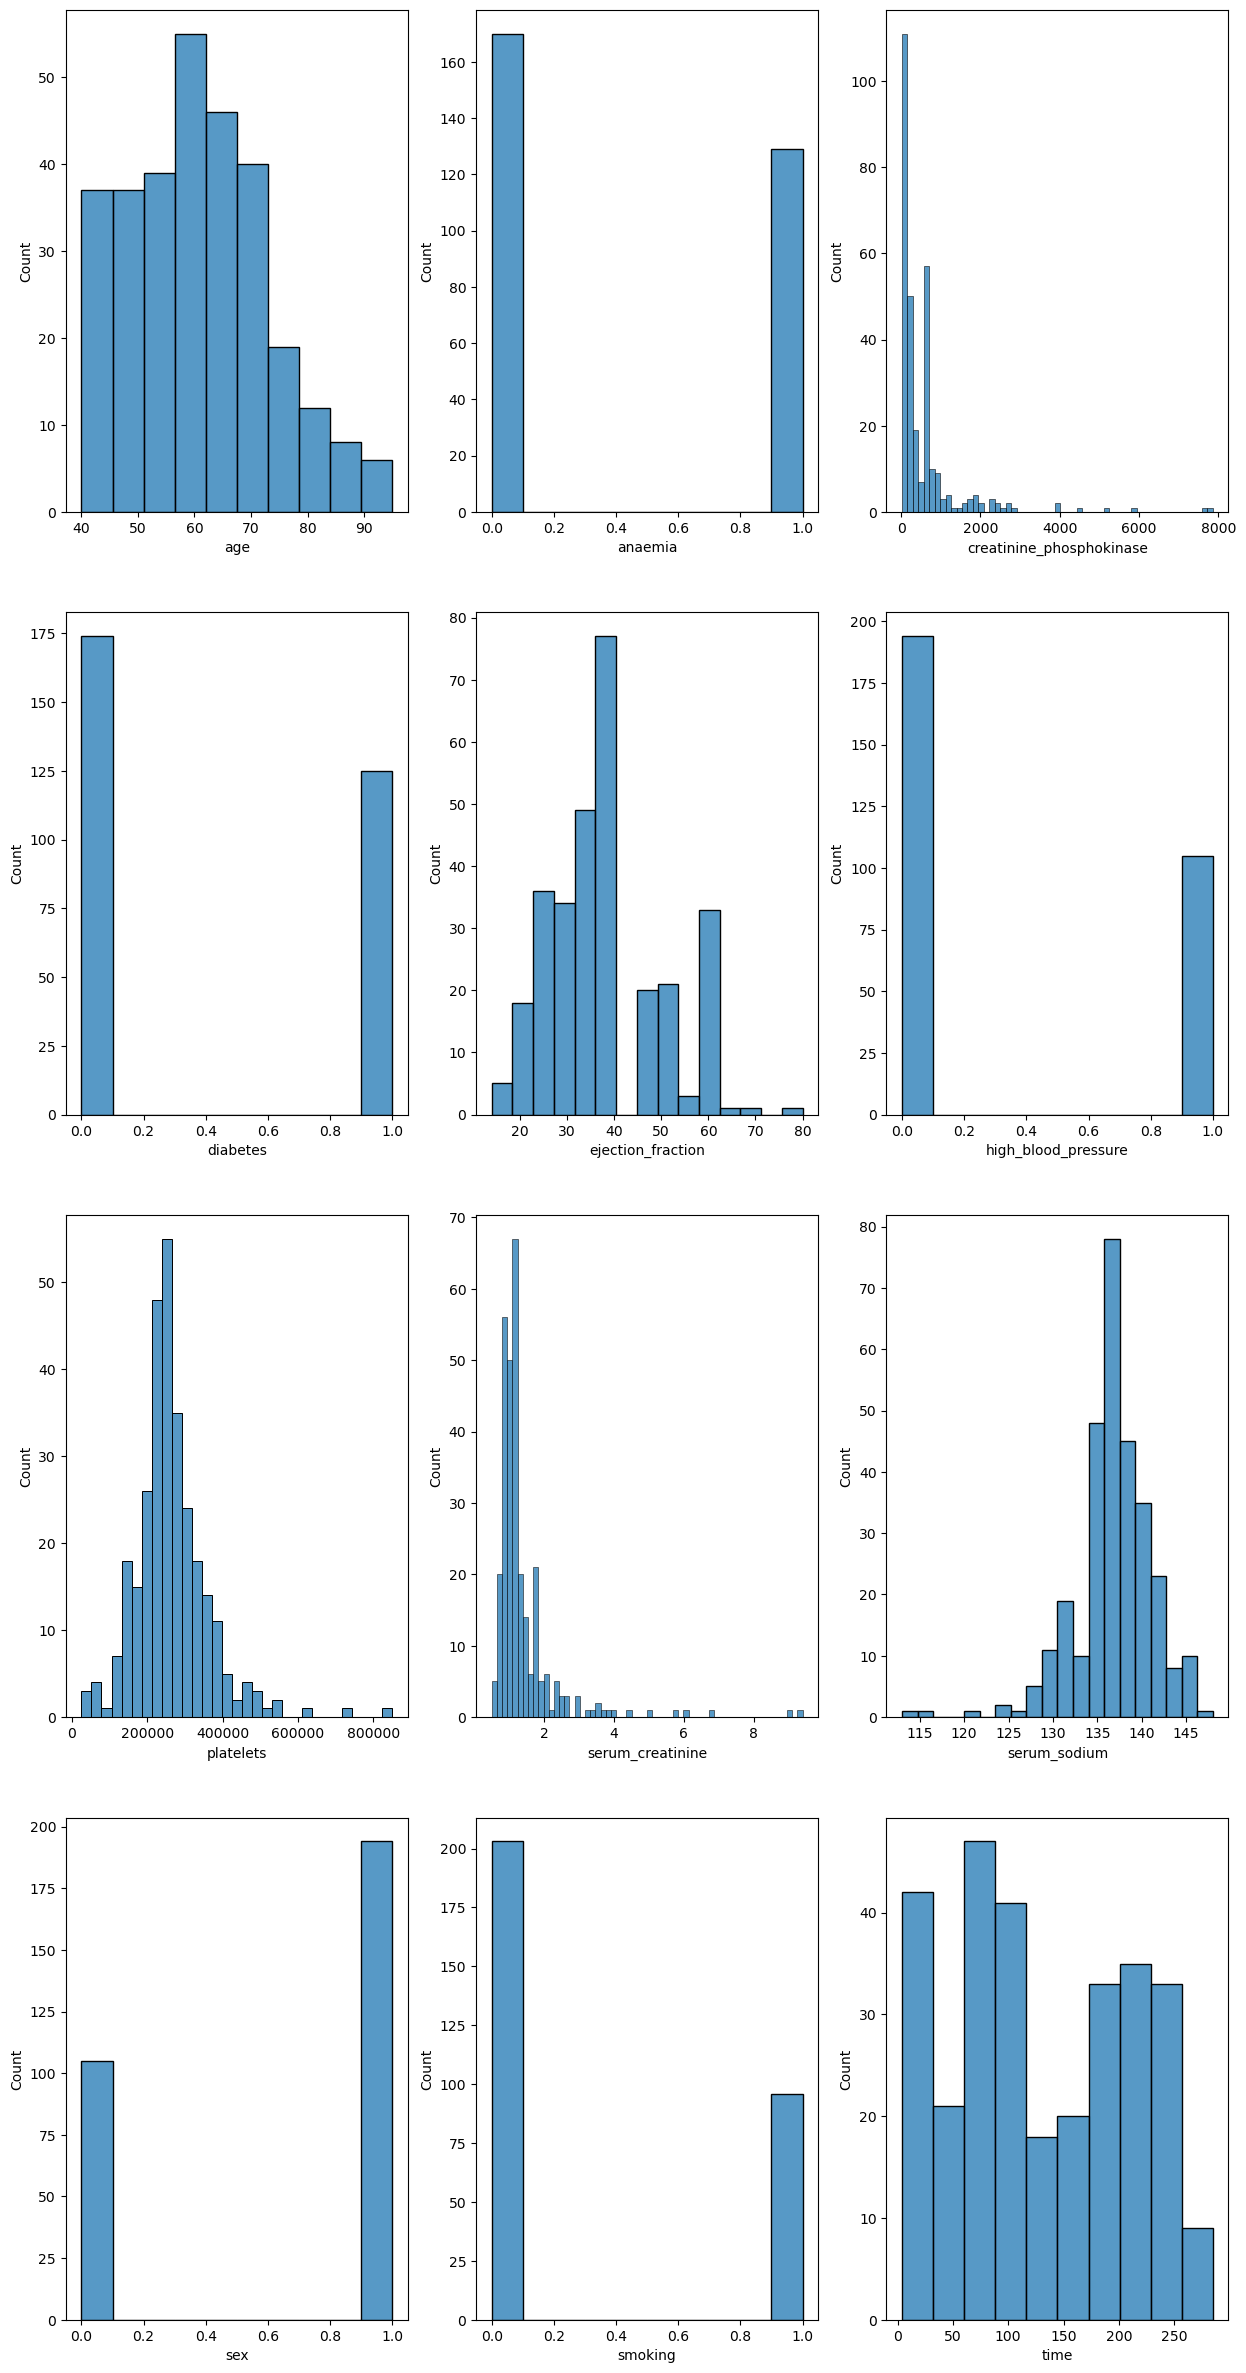

In [7]:
graph.plot_hist_of_numeric(df_heart.drop(columns='DEATH_EVENT'), n_cols=3)

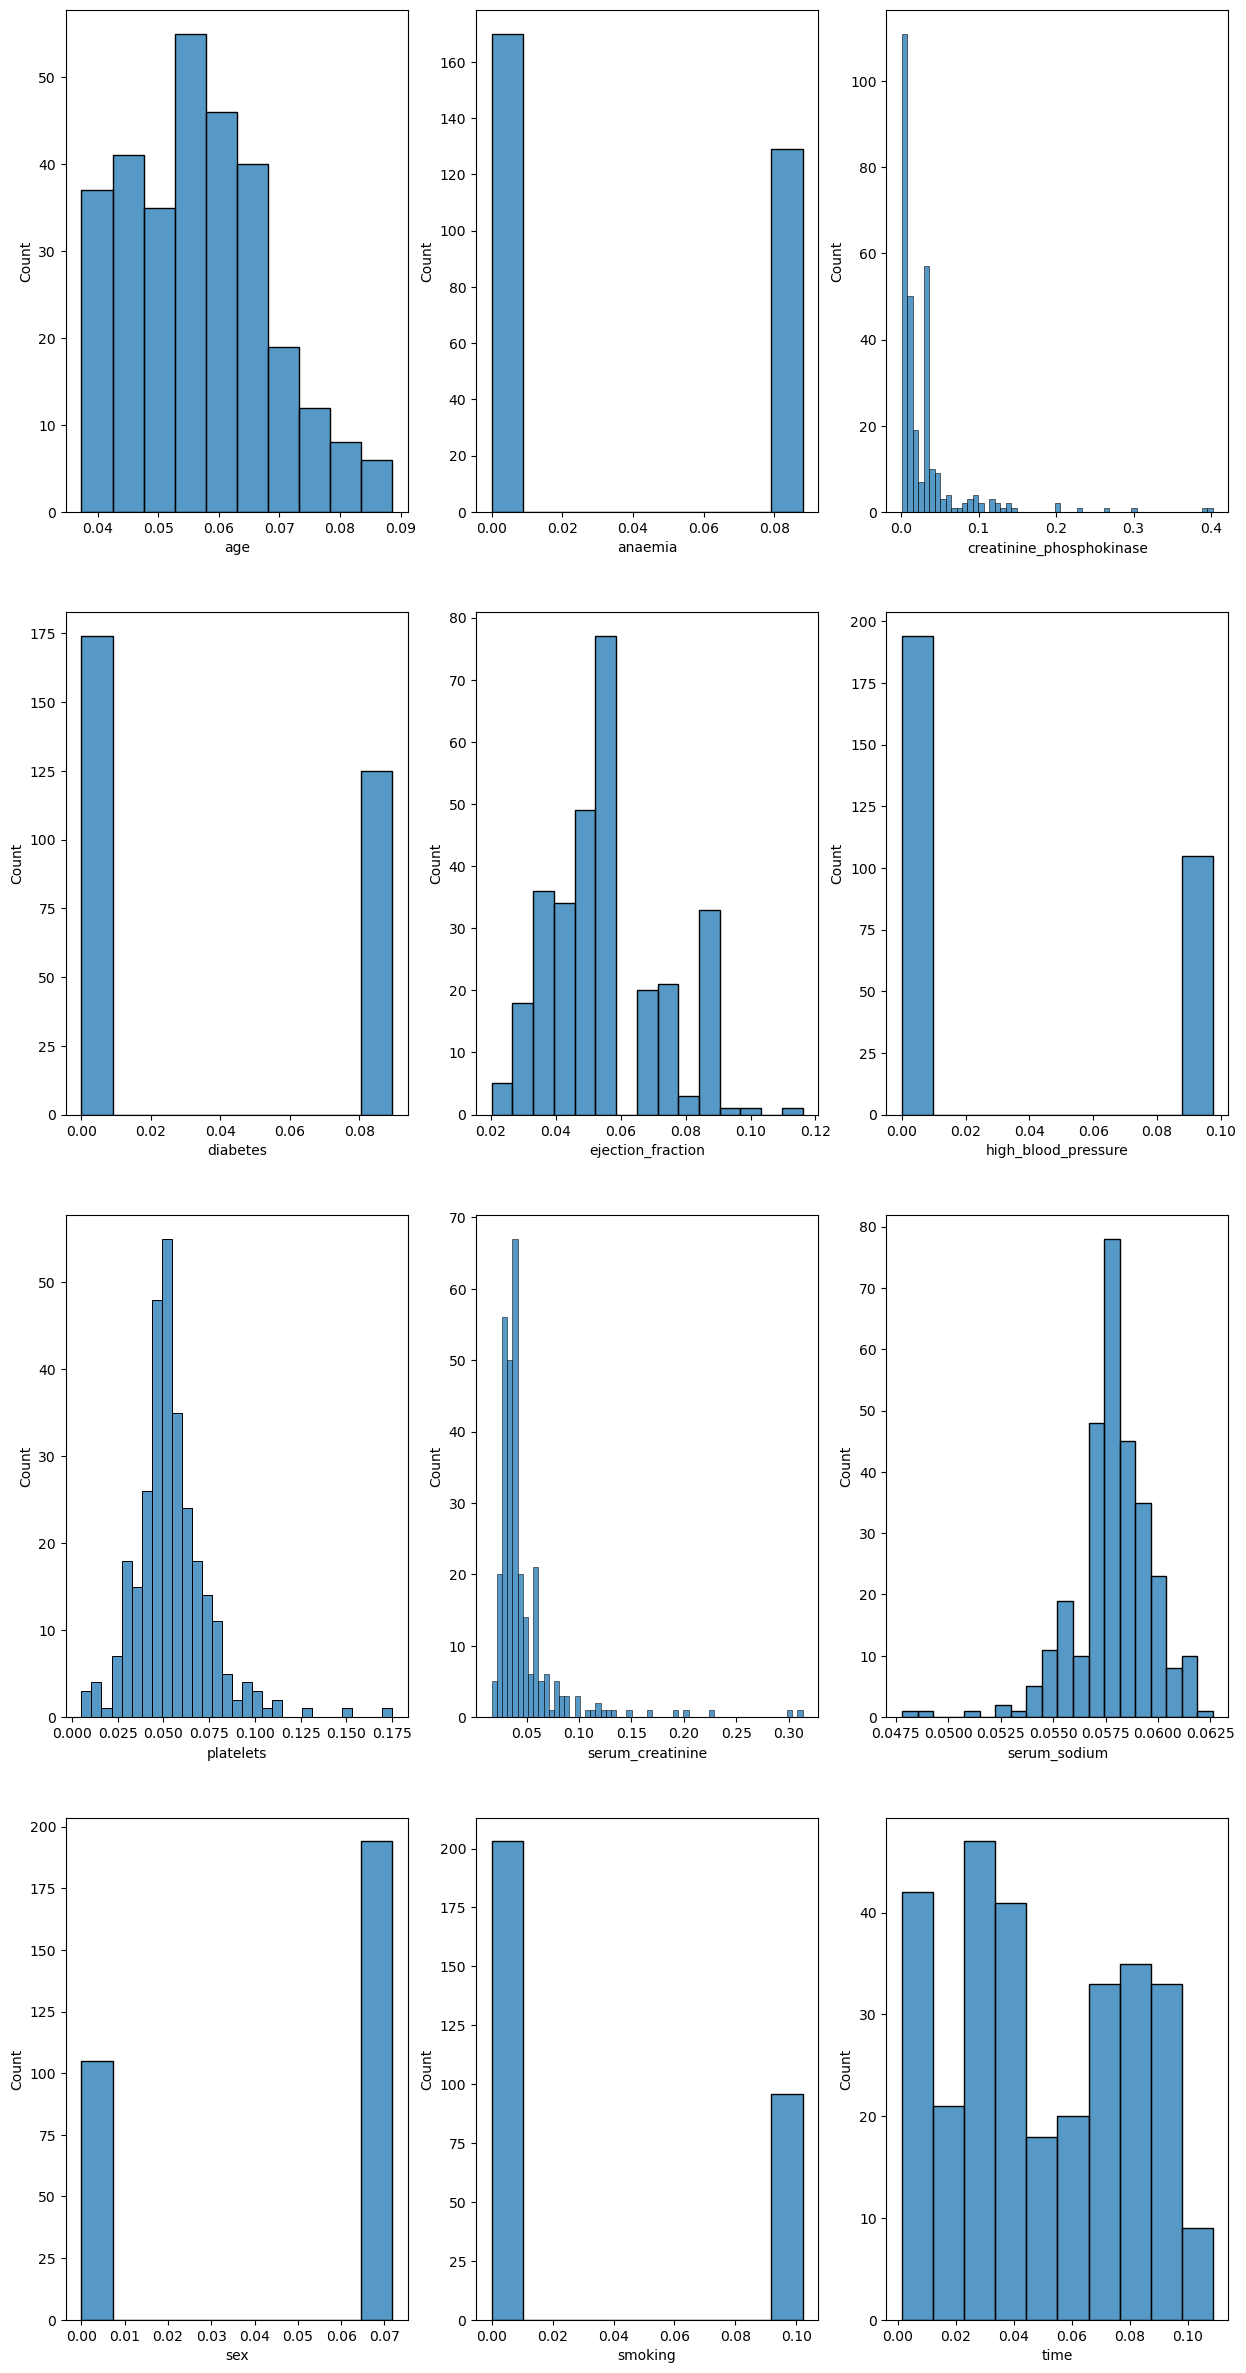

In [8]:
df_heart_normalized = pd.DataFrame(
    data=normalize(df_heart.drop(columns='DEATH_EVENT'), axis=0),
    columns=df_heart.drop(columns='DEATH_EVENT').columns
)
graph.plot_hist_of_numeric(df_heart_normalized, n_cols=3)

By rescaling each sample to unit norm, `normalize` is shrinking some values into tiny ranges, which is no good

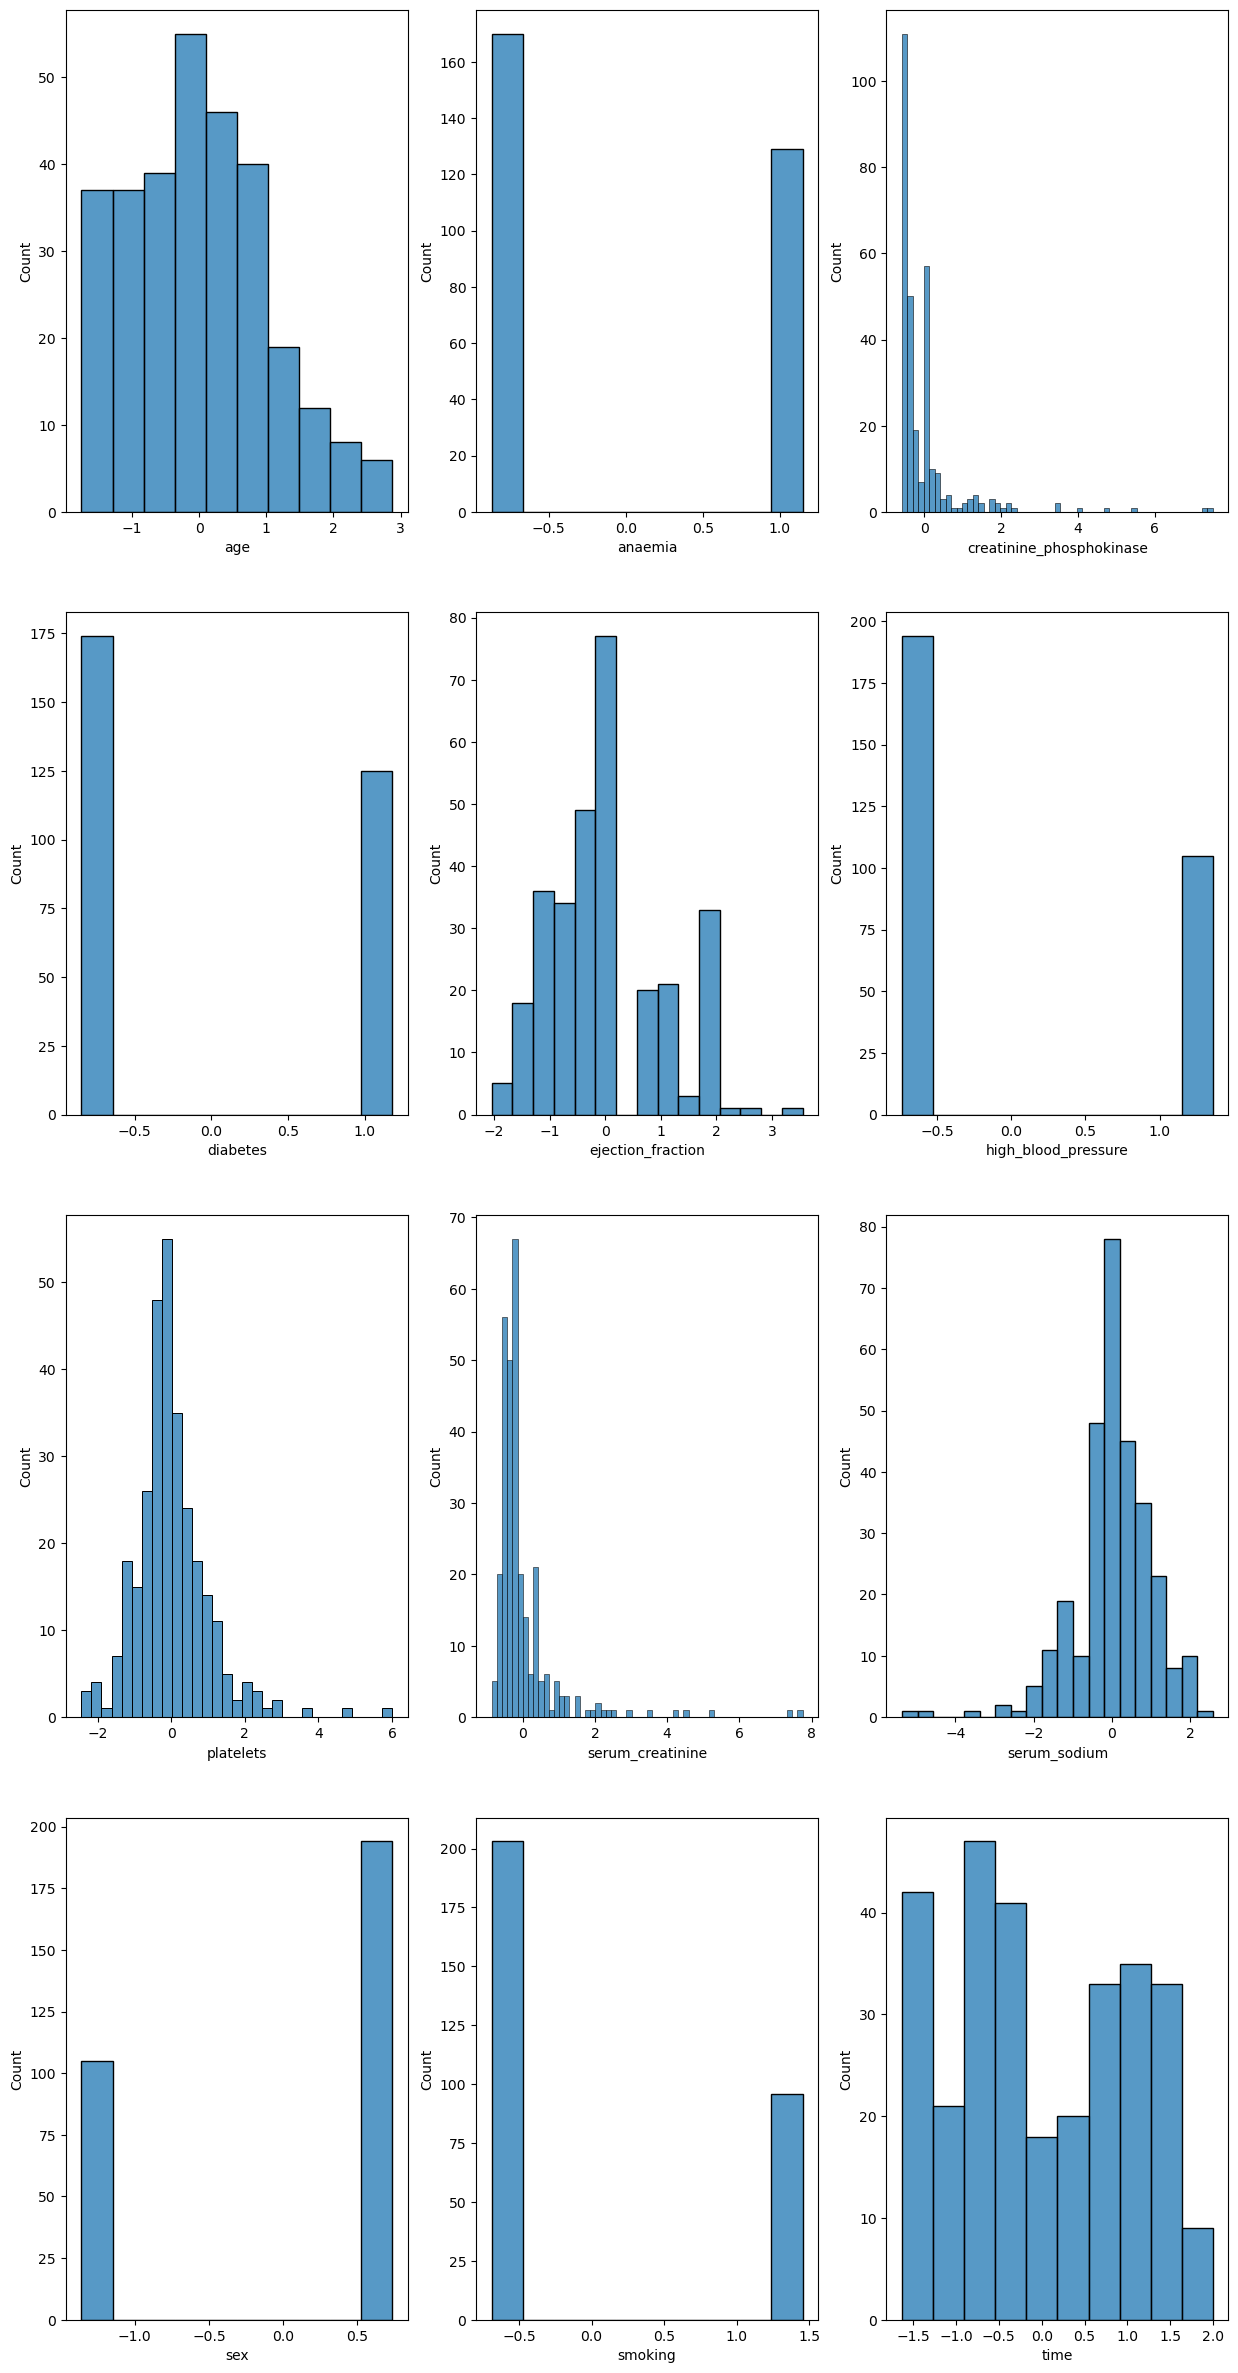

In [9]:
df_heart_normalized = pd.DataFrame(
    data=scale(df_heart.drop(columns='DEATH_EVENT'), axis=0),
    columns=df_heart.drop(columns='DEATH_EVENT').columns
)
graph.plot_hist_of_numeric(df_heart_normalized, n_cols=3)

# Output Label Imbalance

<Axes: xlabel='DEATH_EVENT', ylabel='Count'>

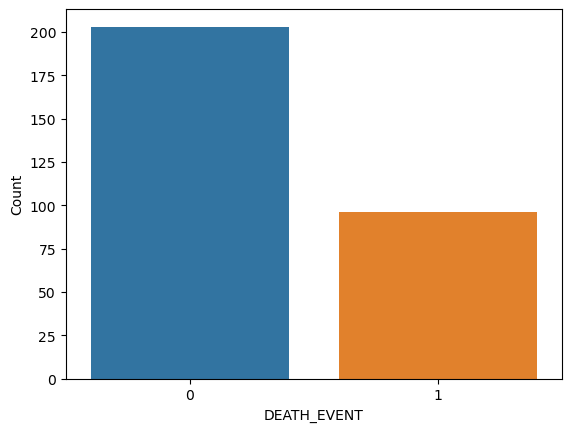

In [10]:
df_outcome_count = explore.count_group(df_heart, ['DEATH_EVENT'])
sns.barplot(df_outcome_count, x='DEATH_EVENT', y='Count')

Data is skewed towards survival by a factor of 2:1